# **MUSIC GENRE CLASSIFICATION**
# GROUP-1

NALLA VEDAVATHI - 19MIA1106

SNEHA M - 19MIA1101

BACHU AKSHITHA - 19MIA1096

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
audio_data = '/content/drive/MyDrive/Classroom/Projects/Music Genre Classification/Data/genres_original/blues/blues.00006.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(audio_data, sr=44100)

(array([ 0.18108444,  0.26436776,  0.28416514, ..., -0.47086203,
        -0.4199038 , -0.21476781], dtype=float32), 44100)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_data)

Amplitude Graph

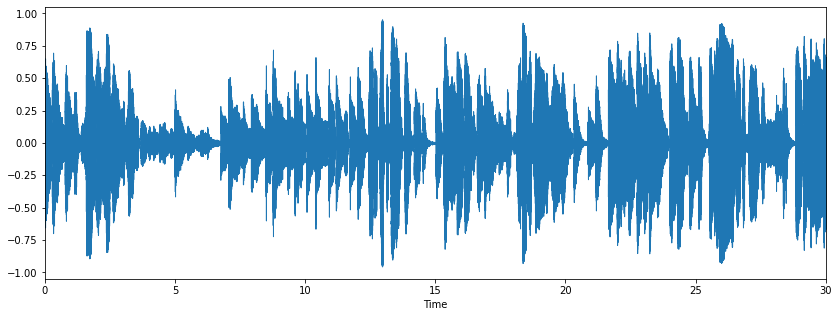

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

***Spectogram***

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. 

In [ ]:
def to_decibles(signal):
    # Perform short time Fourier Transformation of signal and take absolute value of results
    stft = np.abs(librosa.stft(signal))
    # Convert to dB
    D = librosa.amplitude_to_db(stft, ref = np.max) # Set reference value to the maximum value of stft.
    return D # Return converted audio signal

# Function to plot the converted audio signal
def plot_spec(D, sr, instrument):
    fig, ax = plt.subplots(figsize = (30,10))
    spec = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title = 'Spectrogram of ' + instrument)
    fig.colorbar(spec)

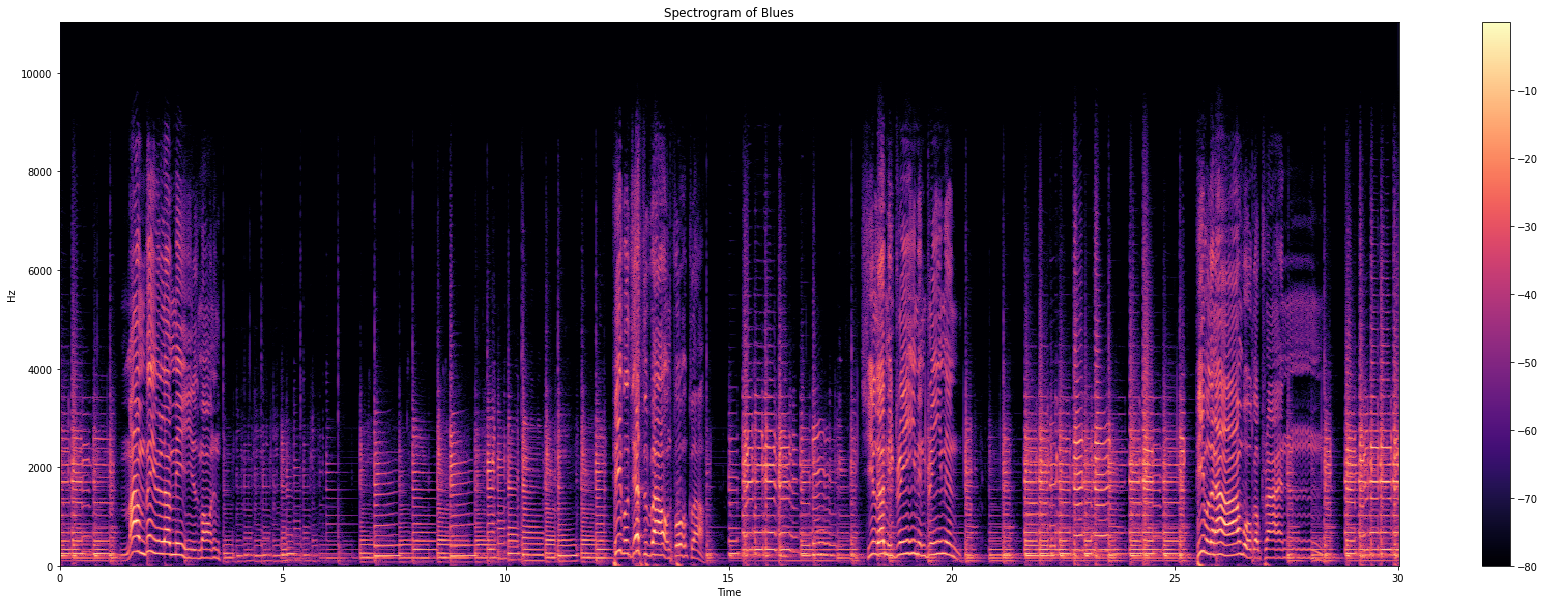

In [ ]:
plot_spec(to_decibles(x), sr, 'Blues')

In [ ]:
from PIL import Image
im = Image.open('/content/drive/MyDrive/Classroom/Projects/Music Genre Classification/Data/images_original/blues/blues00006.png')
im.show()

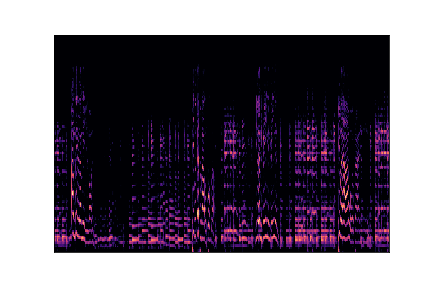

In [ ]:
import IPython.display as display
from PIL import Image
display.display(Image.open('/content/drive/MyDrive/Classroom/Projects/Music Genre Classification/Data/images_original/blues/blues00006.png'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop,Adagrad,Adadelta
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16

In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/Classroom/Projects/Music Genre Classification/Data/images_original'))

['metal', 'blues', 'classical', 'pop', 'jazz', 'country', 'reggae', 'rock', 'disco', 'hiphop']


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Classroom/Projects/Music Genre Classification/Data/features_30_sec.csv')

In [ ]:
def get_image_path(x):
    splited = x.split('.')
    folder = '/content/drive/MyDrive/Classroom/Projects/Music Genre Classification/Data/images_original/'+splited[0] + '/'
    filename = splited[0]+splited[1]+'.png'
    return folder+filename

In [ ]:
data['path'] = data['filename'].apply(get_image_path)
data

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,path
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues,/content/drive/MyDrive/Classroom/Projects/Musi...
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues,/content/drive/MyDrive/Classroom/Projects/Musi...
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues,/content/drive/MyDrive/Classroom/Projects/Musi...
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues,/content/drive/MyDrive/Classroom/Projects/Musi...
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues,/content/drive/MyDrive/Classroom/Projects/Musi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock,/content/drive/MyDrive/Classroom/Projects/Musi...
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock,/content/drive/MyDrive/Classroom/Projects/Musi...
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock,/content/drive/MyDrive/Classroom/Projects/Musi...
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock,/content/drive/MyDrive/Classroom/Projects/Musi...


In [ ]:
data = data[['filename','path']]

In [ ]:
data['genre'] = data['filename'].apply(lambda x:x.split('.')[0])
data

,filename,path,genre
0,blues.00000.wav,/content/drive/MyDrive/Classroom/Projects/Musi...,blues
1,blues.00001.wav,/content/drive/MyDrive/Classroom/Projects/Musi...,blues
2,blues.00002.wav,/content/drive/MyDrive/Classroom/Projects/Musi...,blues
3,blues.00003.wav,/content/drive/MyDrive/Classroom/Projects/Musi...,blues
4,blues.00004.wav,/content/drive/MyDrive/Classroom/Projects/Musi...,blues
...,...,...,...
995,rock.00095.wav,/content/drive/MyDrive/Classroom/Projects/Musi...,rock
996,rock.00096.wav,/content/drive/MyDrive/Classroom/Projects/Musi...,rock
997,rock.00097.wav,/content/drive/MyDrive/Classroom/Projects/Musi...,rock
998,rock.00098.wav,/content/drive/MyDrive/Classroom/Projects/Musi...,rock


In [ ]:
X = data.iloc[: ,0:1]
y = data.iloc[:,1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,y_train, X_test,y_test = train_test_split(X,y,  test_size=0.2, random_state=15)

In [ ]:
len(X_train.genre.unique()),len(X_test.genre.unique())

(10, 10)

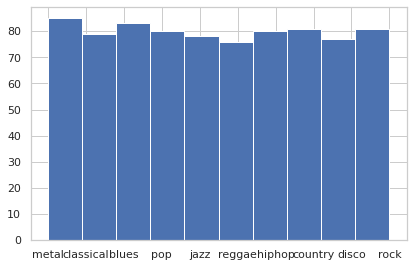

In [ ]:
X_train.genre.hist()

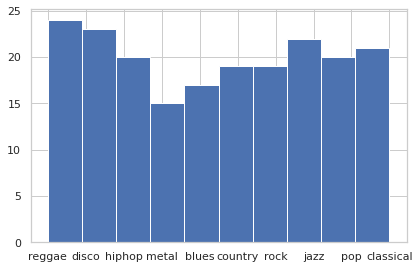

In [ ]:
X_test.genre.hist()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [ ]:
it = datagen.flow_from_dataframe(
    data,
    x_col="path",
    y_col="genre",batch_size=1)

Found 999 validated image filenames belonging to 10 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


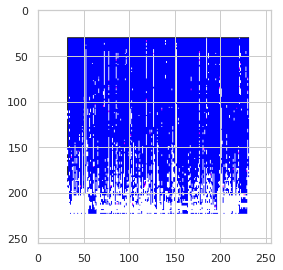

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(next(it)[0][0])

In [ ]:
next(it)[0][0].shape

(256, 256, 3)

**ResNet50**

Finetuning

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input
inp = Input(shape = next(it)[0][0].shape)
model = ResNet50(
    include_top=False,
    weights="imagenet",
    
    classes=10,
    input_tensor = inp
)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in model.layers:
    layer.trainable=False

In [ ]:
model.input.shape

TensorShape([None, 256, 256, 3])

In [ ]:
from tensorflow.keras.layers import BatchNormalization,Dropout,Conv2D
new_model = Sequential()
new_model.add(model)
new_model.add(Flatten())
new_model.add(BatchNormalization())
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(BatchNormalization())
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(10, activation='softmax'))

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 batch_normalization (BatchN  (None, 131072)           524288    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               16777344  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [ ]:
new_model.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(
    monitor='val_accuracy', restore_best_weights=True, patience=3
)

new_model.fit(datagen.flow_from_dataframe(
    X_train,
    x_col="path",
    y_col="genre",batch_size=100),
              validation_data=datagen.flow_from_dataframe(
            X_test,
            x_col="path",
            y_col="genre",batch_size=64),epochs=50,callbacks=[es])

Found 799 validated image filenames belonging to 10 classes.
Found 200 validated image filenames belonging to 10 classes.
Epoch 1/50
8/8 [==============================] - 224s 26s/step - loss: 2.4331 - accuracy: 0.2253 - val_loss: 3.9933 - val_accuracy: 0.4000
Epoch 2/50
8/8 [==============================] - 9s 1s/step - loss: 1.8723 - accuracy: 0.3692 - val_loss: 2.4654 - val_accuracy: 0.4700
Epoch 3/50
8/8 [==============================] - 9s 1s/step - loss: 1.6537 - accuracy: 0.4518 - val_loss: 1.9852 - val_accuracy: 0.4800
Epoch 4/50
8/8 [==============================] - 9s 1s/step - loss: 1.4796 - accuracy: 0.4981 - val_loss: 1.7590 - val_accuracy: 0.5000
Epoch 5/50
8/8 [==============================] - 9s 1s/step - loss: 1.3779 - accuracy: 0.5369 - val_loss: 1.6236 - val_accuracy: 0.5250
Epoch 6/50
8/8 [==============================] - 9s 1s/step - loss: 1.2338 - accuracy: 0.5857 - val_loss: 1.5007 - val_accuracy: 0.5350
Epoch 7/50
8/8 [==============================] - 9s 

In [ ]:
new_model.evaluate(datagen.flow_from_dataframe(
    X_test,
    x_col="path",
    y_col="genre",batch_size=64))

Found 200 validated image filenames belonging to 10 classes.
4/4 [==============================] - 2s 372ms/step - loss: 1.1443 - accuracy: 0.6500


[1.1443243026733398, 0.6499999761581421]

In [ ]:
ResNet_scores = new_model.evaluate(datagen.flow_from_dataframe(
    X_test,
    x_col="path",
    y_col="genre",batch_size=64))

Found 200 validated image filenames belonging to 10 classes.
4/4 [==============================] - 2s 370ms/step - loss: 1.1443 - accuracy: 0.6500


In [ ]:
print(" %.2f%%" % ( ResNet_scores[1]*100))

 65.00%


**VGG16**

Finetuning

In [ ]:
it = datagen.flow_from_dataframe(
    data,
    x_col="path",
    y_col="genre",batch_size=1)

Found 999 validated image filenames belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input
inp = Input(shape = next(it)[0][0].shape)
model1 = VGG16(
    include_top=False,
    weights="imagenet",
    
    classes=10,
    input_tensor = inp
)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in model1.layers:
    layer.trainable=False

In [ ]:
model1.input.shape

TensorShape([None, 256, 256, 3])

In [ ]:
from tensorflow.keras import layers
# Flatten the output layer to 1 dimension
new_model1 = layers.Flatten()(model1.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
new_model1 = layers.Dense(4096, activation='relu')(new_model1)

# Add a dropout rate of 0.5
new_model1 = layers.Dropout(0.5)(new_model1)

# Add a final sigmoid layer with 1 node for classification output
new_model1 = layers.Dense(10, activation='softmax')(new_model1)

final_model1 = tf.keras.models.Model(model1.input, new_model1)

In [ ]:
final_model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
final_model1.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
X_train.shape

(800, 3)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(
    monitor='val_accuracy', restore_best_weights=True, patience=3
)

final_model1.fit(datagen.flow_from_dataframe(
    X_train,
    x_col="path",
    y_col="genre",batch_size=100),
              validation_data=datagen.flow_from_dataframe(
            X_test,
            x_col="path",
            y_col="genre",batch_size=64),epochs=50,callbacks=[es])

Found 799 validated image filenames belonging to 10 classes.
Found 200 validated image filenames belonging to 10 classes.
Epoch 1/50
8/8 [==============================] - 36s 5s/step - loss: 272.9385 - accuracy: 0.2215 - val_loss: 171.4277 - val_accuracy: 0.2500
Epoch 2/50
8/8 [==============================] - 15s 2s/step - loss: 107.1405 - accuracy: 0.4230 - val_loss: 45.4078 - val_accuracy: 0.4150
Epoch 3/50
8/8 [==============================] - 16s 2s/step - loss: 24.8963 - accuracy: 0.5419 - val_loss: 24.4607 - val_accuracy: 0.4750
Epoch 4/50
8/8 [==============================] - 15s 2s/step - loss: 10.1852 - accuracy: 0.6771 - val_loss: 13.1776 - val_accuracy: 0.5200
Epoch 5/50
8/8 [==============================] - 15s 2s/step - loss: 4.1752 - accuracy: 0.7572 - val_loss: 7.4210 - val_accuracy: 0.6100
Epoch 6/50
8/8 [==============================] - 15s 2s/step - loss: 1.9307 - accuracy: 0.8123 - val_loss: 5.3333 - val_accuracy: 0.5800
Epoch 7/50
8/8 [=======================

In [ ]:
final_model1.evaluate(datagen.flow_from_dataframe(
    X_test,
    x_col="path",
    y_col="genre",batch_size=64))

Found 200 validated image filenames belonging to 10 classes.
4/4 [==============================] - 3s 638ms/step - loss: 2.8220 - accuracy: 0.6450


[2.8220410346984863, 0.6449999809265137]

In [ ]:
VGG16_scores = final_model1.evaluate(datagen.flow_from_dataframe(
    X_test,
    x_col="path",
    y_col="genre",batch_size=64))

Found 200 validated image filenames belonging to 10 classes.
4/4 [==============================] - 3s 518ms/step - loss: 2.8220 - accuracy: 0.6450


In [ ]:
print(VGG16_scores)

[2.822039842605591, 0.6449999809265137]


In [ ]:
print(" %.2f%%" % ( VGG16_scores[1]*100))

 64.50%


**INCEPTIONV3**

Fine Tuning

In [ ]:
it = datagen.flow_from_dataframe(data,x_col="path",y_col="genre",batch_size=1)

Found 999 validated image filenames belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input
inp = Input(shape = next(it)[0][0].shape)
model2 = InceptionV3(
    include_top=False,
    weights="imagenet",
    classes=10,
    input_tensor = inp
)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in model2.layers:
    layer.trainable=False

In [ ]:
from tensorflow.keras import layers
# Flatten the output layer to 1 dimension
new_model2 = layers.Flatten()(model2.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
new_model2 = layers.Dense(1024, activation='relu')(new_model2)

# Add a dropout rate of 0.2
new_model2 = layers.Dropout(0.2)(new_model2)

# Add a final sigmoid layer with 1 node for classification output
new_model2 = layers.Dense(10, activation='softmax')(new_model2)

final_model2 = tf.keras.models.Model(model2.input, new_model2)

In [ ]:
final_model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 73728)             0         
                                                                 
 dense_7 (Dense)             (None, 1024)              75498496  
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                10250     
                                                                 
Total params: 97,311,530
Trainable params: 75,508,746
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
final_model2.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(
    monitor='val_accuracy', restore_best_weights=True, patience=3
)

final_model2.fit(datagen.flow_from_dataframe(
    X_train,
    x_col="path",
    y_col="genre",batch_size=100),
              validation_data=datagen.flow_from_dataframe(
            X_test,
            x_col="path",
            y_col="genre",batch_size=64),epochs=50,callbacks=[es])

Found 799 validated image filenames belonging to 10 classes.
Found 200 validated image filenames belonging to 10 classes.
Epoch 1/50
8/8 [==============================] - 24s 2s/step - loss: 2312.7266 - accuracy: 0.1189 - val_loss: 1369.4250 - val_accuracy: 0.2100
Epoch 2/50
8/8 [==============================] - 8s 967ms/step - loss: 1123.6622 - accuracy: 0.2153 - val_loss: 705.7430 - val_accuracy: 0.2600
Epoch 3/50
8/8 [==============================] - 8s 962ms/step - loss: 383.7527 - accuracy: 0.2904 - val_loss: 246.4879 - val_accuracy: 0.2800
Epoch 4/50
8/8 [==============================] - 8s 984ms/step - loss: 161.1486 - accuracy: 0.3304 - val_loss: 74.0731 - val_accuracy: 0.3350
Epoch 5/50
8/8 [==============================] - 8s 959ms/step - loss: 35.6517 - accuracy: 0.4080 - val_loss: 9.7351 - val_accuracy: 0.3550
Epoch 6/50
8/8 [==============================] - 8s 916ms/step - loss: 4.2483 - accuracy: 0.3217 - val_loss: 28.9307 - val_accuracy: 0.1050
Epoch 7/50
8/8 [====

In [ ]:
final_model2.evaluate(datagen.flow_from_dataframe(
    X_test,
    x_col="path",
    y_col="genre",batch_size=64))

Found 200 validated image filenames belonging to 10 classes.
4/4 [==============================] - 2s 327ms/step - loss: 9.7351 - accuracy: 0.3550


[9.735074043273926, 0.35499998927116394]

In [ ]:
InceptionV3_scores = final_model2.evaluate(datagen.flow_from_dataframe(
    X_test,
    x_col="path",
    y_col="genre",batch_size=64))

Found 200 validated image filenames belonging to 10 classes.
4/4 [==============================] - 2s 299ms/step - loss: 9.7351 - accuracy: 0.3550


In [ ]:
print(" %.2f%%" % ( InceptionV3_scores[1]*100))

 35.50%


**Xception**

Fine tuning

In [ ]:
it = datagen.flow_from_dataframe(data,x_col="path",y_col="genre",batch_size=1)

Found 999 validated image filenames belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input
inp = Input(shape = next(it)[0][0].shape)
model3 = Xception(
    include_top=False,
    weights="imagenet",
    
    classes=10,
    input_tensor = inp
)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
for layer in model3.layers:
    layer.trainable=False

In [ ]:
from tensorflow.keras import layers
# Flatten the output layer to 1 dimension
new_model3 = layers.Flatten()(model3.output)

# Add a dropout rate of 0.2
new_model3 = layers.Dropout(0.2)(new_model3)

# Add a final sigmoid layer with 1 node for classification output
new_model3 = layers.Dense(10, activation='softmax')(new_model3)

final_model3 = tf.keras.models.Model(model3.input, new_model3)

In [ ]:
final_model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten_6 (Flatten)         (None, 131072)            0         
                                                                 
 dropout_4 (Dropout)         (None, 131072)            0         
                                                                 
 dense_9 (Dense)             (None, 10)                1310730   
                                                                 
Total params: 22,172,210
Trainable params: 1,310,730
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
final_model3.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(
    monitor='val_accuracy', restore_best_weights=True, patience=3
)

final_model3.fit(datagen.flow_from_dataframe(
    X_train,
    x_col="path",
    y_col="genre",batch_size=100),
              validation_data=datagen.flow_from_dataframe(
            X_test,
            x_col="path",
            y_col="genre",batch_size=64),epochs=50,callbacks=[es])

Found 799 validated image filenames belonging to 10 classes.
Found 200 validated image filenames belonging to 10 classes.
Epoch 1/50
8/8 [==============================] - 72s 9s/step - loss: 183.0119 - accuracy: 0.1339 - val_loss: 242.0247 - val_accuracy: 0.0850
Epoch 2/50
8/8 [==============================] - 12s 2s/step - loss: 144.4788 - accuracy: 0.1677 - val_loss: 103.8414 - val_accuracy: 0.1900
Epoch 3/50
8/8 [==============================] - 12s 1s/step - loss: 78.9643 - accuracy: 0.2904 - val_loss: 67.3496 - val_accuracy: 0.2600
Epoch 4/50
8/8 [==============================] - 12s 1s/step - loss: 40.9229 - accuracy: 0.3442 - val_loss: 41.3923 - val_accuracy: 0.3000
Epoch 5/50
8/8 [==============================] - 12s 1s/step - loss: 23.7086 - accuracy: 0.4318 - val_loss: 37.0942 - val_accuracy: 0.2650
Epoch 6/50
8/8 [==============================] - 12s 1s/step - loss: 17.7745 - accuracy: 0.4831 - val_loss: 28.7289 - val_accuracy: 0.3150
Epoch 7/50
8/8 [==================

In [ ]:
final_model3.evaluate(datagen.flow_from_dataframe(
    X_test,
    x_col="path",
    y_col="genre",batch_size=64))

Found 200 validated image filenames belonging to 10 classes.
4/4 [==============================] - 3s 500ms/step - loss: 17.5081 - accuracy: 0.4550


[17.508089065551758, 0.45500001311302185]

In [ ]:
Xception_scores = final_model3.evaluate(datagen.flow_from_dataframe(
    X_test,
    x_col="path",
    y_col="genre",batch_size=64))

Found 200 validated image filenames belonging to 10 classes.
4/4 [==============================] - 3s 500ms/step - loss: 17.5081 - accuracy: 0.4550


In [ ]:
print(" %.2f%%" % ( Xception_scores[1]*100))

 45.50%


**MobileNetV2**

Finetuning

In [ ]:
it = datagen.flow_from_dataframe(data,x_col="path",
    y_col="genre",batch_size=1)

Found 999 validated image filenames belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input
inp = Input(shape = next(it)[0][0].shape)
model4 = MobileNetV2(
    include_top=False,
    weights="imagenet",
    
    classes=10,
    input_tensor = inp
)

In [ ]:
for layer in model4.layers:
    layer.trainable=False

In [ ]:
from tensorflow.keras.layers import BatchNormalization,Dropout
new_model4 = Sequential()
new_model4.add(model4)
new_model4.add(Flatten())
new_model4.add(Dense(1024, activation='relu'))
new_model4.add(Dropout(0.5))
new_model4.add(BatchNormalization())
new_model4.add(Dense(10, activation='softmax'))

In [ ]:
new_model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_16 (Flatten)        (None, 81920)             0         
                                                                 
 dense_30 (Dense)            (None, 1024)              83887104  
                                                                 
 dropout_16 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_288 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dense_31 (Dense)            (None, 10)               

In [ ]:
new_model4.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(
    monitor='val_accuracy', restore_best_weights=True, patience=3
)

new_model4.fit(datagen.flow_from_dataframe(
    X_train,
    x_col="path",
    y_col="genre",batch_size=100),
              validation_data=datagen.flow_from_dataframe(
            X_test,
            x_col="path",
            y_col="genre",batch_size=64),epochs=50,callbacks=[es])

Found 799 validated image filenames belonging to 10 classes.
Found 200 validated image filenames belonging to 10 classes.
Epoch 1/50
8/8 [==============================] - 18s 1s/step - loss: 2.1871 - accuracy: 0.3517 - val_loss: 7.3380 - val_accuracy: 0.3850
Epoch 2/50
8/8 [==============================] - 9s 1s/step - loss: 1.3493 - accuracy: 0.5620 - val_loss: 3.6017 - val_accuracy: 0.4250
Epoch 3/50
8/8 [==============================] - 10s 1s/step - loss: 1.1329 - accuracy: 0.6033 - val_loss: 2.7677 - val_accuracy: 0.4400
Epoch 4/50
8/8 [==============================] - 11s 1s/step - loss: 0.9868 - accuracy: 0.6395 - val_loss: 2.1923 - val_accuracy: 0.4600
Epoch 5/50
8/8 [==============================] - 7s 899ms/step - loss: 0.8779 - accuracy: 0.6946 - val_loss: 1.8398 - val_accuracy: 0.4950
Epoch 6/50
8/8 [==============================] - 8s 1s/step - loss: 0.7249 - accuracy: 0.7672 - val_loss: 1.7551 - val_accuracy: 0.5000
Epoch 7/50
8/8 [==============================] - 

In [ ]:
MobilenetV2_scores = new_model4.evaluate(datagen.flow_from_dataframe(
    X_test,
    x_col="path",
    y_col="genre",batch_size=64))

Found 200 validated image filenames belonging to 10 classes.
4/4 [==============================] - 1s 298ms/step - loss: 1.4889 - accuracy: 0.5450


In [ ]:
print("%.2f%%" %(MobilenetV2_scores[1]*100))

54.50%


**DenseNet**

Finetuning

In [ ]:
it = datagen.flow_from_dataframe(
    data,
    x_col="path",
    y_col="genre",batch_size=1)

Found 999 validated image filenames belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input
inp = Input(shape = next(it)[0][0].shape)
model5 = DenseNet201(
    include_top=False,
    weights="imagenet",
    
    classes=10,
    input_tensor = inp
)

In [ ]:
for layer in model5.layers:
    layer.trainable=False

In [ ]:
from tensorflow.keras.layers import BatchNormalization,Dropout,Conv2D
new_model5 = Sequential()
new_model5.add(model5)
new_model5.add(Flatten())
new_model5.add(BatchNormalization())
new_model5.add(Dense(1024, activation='relu'))
new_model5.add(Dropout(0.5))
new_model5.add(BatchNormalization())
new_model5.add(Dense(1024, activation='relu'))
new_model5.add(Dropout(0.5))
new_model5.add(Dense(10, activation='softmax'))

In [ ]:
new_model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 8, 8, 1920)        18321984  
                                                                 
 flatten_21 (Flatten)        (None, 122880)            0         
                                                                 
 batch_normalization_294 (Ba  (None, 122880)           491520    
 tchNormalization)                                               
                                                                 
 dense_36 (Dense)            (None, 1024)              125830144 
                                                                 
 dropout_19 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_295 (Ba  (None, 1024)             4096      
 tchNormalization)                                    

In [ ]:
new_model5.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(
    monitor='val_accuracy', restore_best_weights=True, patience=3
)

new_model5.fit(datagen.flow_from_dataframe(
    X_train,
    x_col="path",
    y_col="genre",batch_size=100),
              validation_data=datagen.flow_from_dataframe(
            X_test,
            x_col="path",
            y_col="genre",batch_size=64),epochs=50,callbacks=[es])

Found 799 validated image filenames belonging to 10 classes.
Found 200 validated image filenames belonging to 10 classes.
Epoch 1/50
8/8 [==============================] - 60s 5s/step - loss: 2.1220 - accuracy: 0.3479 - val_loss: 32.4449 - val_accuracy: 0.1750
Epoch 2/50
8/8 [==============================] - 14s 2s/step - loss: 1.4588 - accuracy: 0.5156 - val_loss: 43.8013 - val_accuracy: 0.1100
Epoch 3/50
8/8 [==============================] - 16s 2s/step - loss: 1.2434 - accuracy: 0.6020 - val_loss: 20.3484 - val_accuracy: 0.2050
Epoch 4/50
8/8 [==============================] - 14s 2s/step - loss: 1.2181 - accuracy: 0.6158 - val_loss: 17.8662 - val_accuracy: 0.1600
Epoch 5/50
8/8 [==============================] - 13s 2s/step - loss: 0.9776 - accuracy: 0.6796 - val_loss: 14.7218 - val_accuracy: 0.1750
Epoch 6/50
8/8 [==============================] - 14s 2s/step - loss: 0.8473 - accuracy: 0.6934 - val_loss: 11.2352 - val_accuracy: 0.1750


In [ ]:
DenseNet201_scores = new_model5.evaluate(datagen.flow_from_dataframe(
    X_test,
    x_col="path",
    y_col="genre",batch_size=64))

Found 200 validated image filenames belonging to 10 classes.
4/4 [==============================] - 3s 560ms/step - loss: 20.3484 - accuracy: 0.2050


In [ ]:
print("%.2f%%" %(DenseNet201_scores[1]*100))

20.50%


In [ ]:
from tabulate import tabulate
col_names = ['Model','Accuracy','Depth']
data = [['ResNet50',ResNet_scores[1]*100,107],
        ['VGG16',VGG16_scores[1]*100,16],
        ['InceptionV3',InceptionV3_scores[1]*100,189],
        ['Xception',Xception_scores[1]*100,81],
        ['MobileNetV2',MobilenetV2_scores[1]*100,105],
        ['DensetNet201',DenseNet201_scores[1]*100,402]]

print(tabulate(data, headers=col_names, tablefmt="fancy_grid", showindex="always", floatfmt=".2f"))

╒════╤══════════════╤════════════╤═════════╕
│    │ Model        │   Accuracy │   Depth │
╞════╪══════════════╪════════════╪═════════╡
│  0 │ ResNet50     │      65.00 │     107 │
├────┼──────────────┼────────────┼─────────┤
│  1 │ VGG16        │      64.50 │      16 │
├────┼──────────────┼────────────┼─────────┤
│  2 │ InceptionV3  │      35.50 │     189 │
├────┼──────────────┼────────────┼─────────┤
│  3 │ Xception     │      45.50 │      81 │
├────┼──────────────┼────────────┼─────────┤
│  4 │ MobileNetV2  │      54.50 │     105 │
├────┼──────────────┼────────────┼─────────┤
│  5 │ DensetNet201 │      20.50 │     402 │
╘════╧══════════════╧════════════╧═════════╛


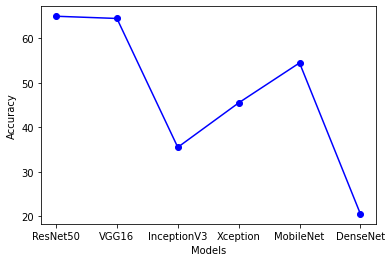

In [ ]:
import matplotlib.pyplot as plt
models=['ResNet50','VGG16','InceptionV3','Xception','MobileNet','DenseNet']
accuracy=[ResNet_scores[1]*100,VGG16_scores[1]*100,InceptionV3_scores[1]*100,
          Xception_scores[1]*100,MobilenetV2_scores[1]*100,DenseNet201_scores[1]*100]
fig, ax = plt.subplots()
plt.plot(models,accuracy,'b-o',label='Models Accuracy');
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

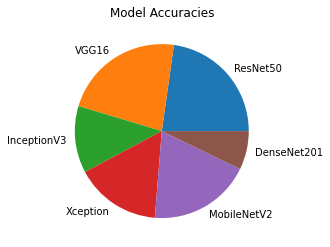

In [ ]:
import matplotlib.pyplot as plt
x = [ResNet_scores[1]*100,VGG16_scores[1]*100,InceptionV3_scores[1]*100,
          Xception_scores[1]*100,MobilenetV2_scores[1]*100,DenseNet201_scores[1]*100]
labels = ['ResNet50','VGG16','InceptionV3','Xception','MobileNetV2','DenseNet201']
fig, ax = plt.subplots()
ax.pie(x, labels = labels)
ax.set_title('Model Accuracies')
plt.show()

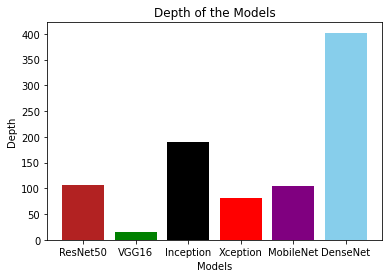

In [ ]:
models=['ResNet50','VGG16','Inception','Xception','MobileNet','DenseNet']
depth = [ 107,16,189,81,105,402]
# Change color of each bar
plt.bar(models,depth, color=['firebrick', 'green', 'black', 'red',
                    'purple', 'skyblue'])
plt.xlabel('Models')
plt.ylabel("Depth")
plt.title('Depth of the Models')
plt.show()